In [3]:
'''
Calibracion.py: programa para calibrar el espectrómetro de cámara Web

Edgar Rueda: septiembre, 2020

Sirve para determinar los parámetros requeridos para que el espectrómetro
funcione.
Los parametros se debe ir modificando y el programa se debe volver a correr.
Para capturar la imagen de trabajo se presiona la tecla "Q".
Los parámetros aquí definidos se usan en el programa ScopeFibra.py
'''

import numpy as np
import cv2
import pylab as plt
from scipy import ndimage, misc
plt.style.use('ggplot')
import pandas as pd

# Calibración

In [4]:
# PARAMETROS
filaup=0
filadown = 120
colleft = 350
colright =380
ang = -90
exposure = -5
fila = 19
izq = 10
der = 120


# FUENTE CALIBRACIÓN
fuente = "Bombilla incandescente"
WL1 = 600
WL2 = 900

X1 = 40
X2 = 100
####################

(480, 640, 3)


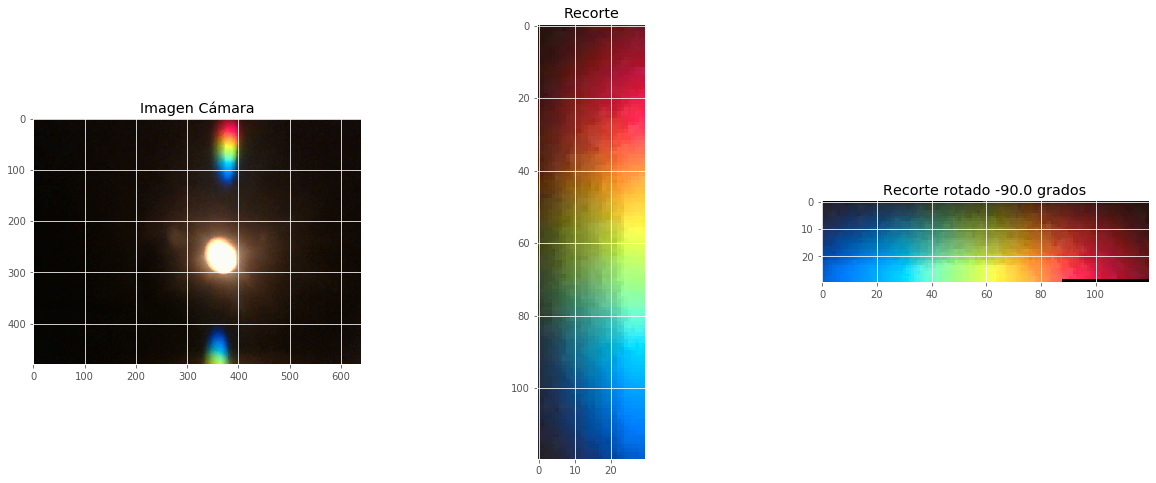

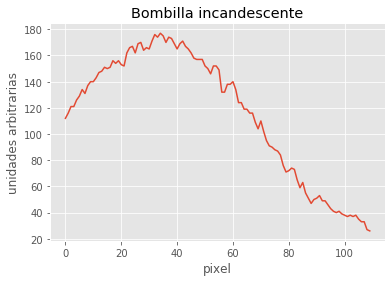

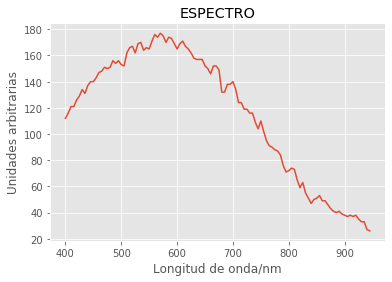

In [7]:
cap = cv2.VideoCapture(0)

#los valores van de -1 = 640 ms hasta -13 = 150 us
#http://www.principiaprogramatica.com/2017/06/11/
#setting-manual-exposure-in-opencv/
#cap.set(cv2.CAP_PROP_EXPOSURE,exposure)


if (cap.isOpened()== False): 
    print("Error opening video stream or file")

cap = cv2.VideoCapture(0, cv2.CAP_DSHOW)
# Define the codec and create VideoWriter object
cap.set(cv2.CAP_PROP_EXPOSURE,exposure)


if (cap.isOpened()== False): 
    print("Error opening video stream or file")

# Read until video is completed
while(cap.isOpened()):

    # Capture frame-by-frame
    ret, frame = cap.read()
    if ret == True:
        # Display the resulting frame
        cv2.imshow('Frame',frame)
        # Press Q on keyboard to  exit
        if cv2.waitKey(25) & 0xFF == ord('q'):
            Ima3 = frame[...,::-1]
            #Ima3 = frame
            print(np.shape(Ima3))
            break

            # Break the loop
  
    else:
        break

# When everything done, release the video capture object
cap.release()

# Closes all the frames
cv2.destroyAllWindows()

Visi = Ima3[filaup:filadown,colleft:colright,:]
spec = ndimage.rotate(Visi,ang)


plt.figure(figsize=(20,8))
plt.subplot(131)
plt.title('Imagen Cámara')
plt.imshow(Ima3)
plt.subplot(132)
plt.title('Recorte')
plt.imshow(Visi)
plt.subplot(133)
plt.title(r'Recorte rotado %.1f grados'%ang)
plt.imshow(spec)
plt.show()

specgris = cv2.cvtColor(spec, cv2.COLOR_BGR2GRAY)
graf = specgris[fila,izq:der]

plt.figure()
plt.title(fuente)
plt.plot(graf)
plt.xlabel('pixel')
plt.ylabel('unidades arbitrarias')
plt.show()

M = (WL2 - WL1)/(X2 - X1)
X = np.arange(0,len(graf),1)
WL = WL2 + M*(X - X2)

plt.figure()
plt.title('ESPECTRO')
plt.plot(WL,graf)
plt.xlabel('Longitud de onda/nm')
plt.ylabel('Unidades arbitrarias')
plt.show()

# Fin de la calibracion

Candela

(480, 640, 3)


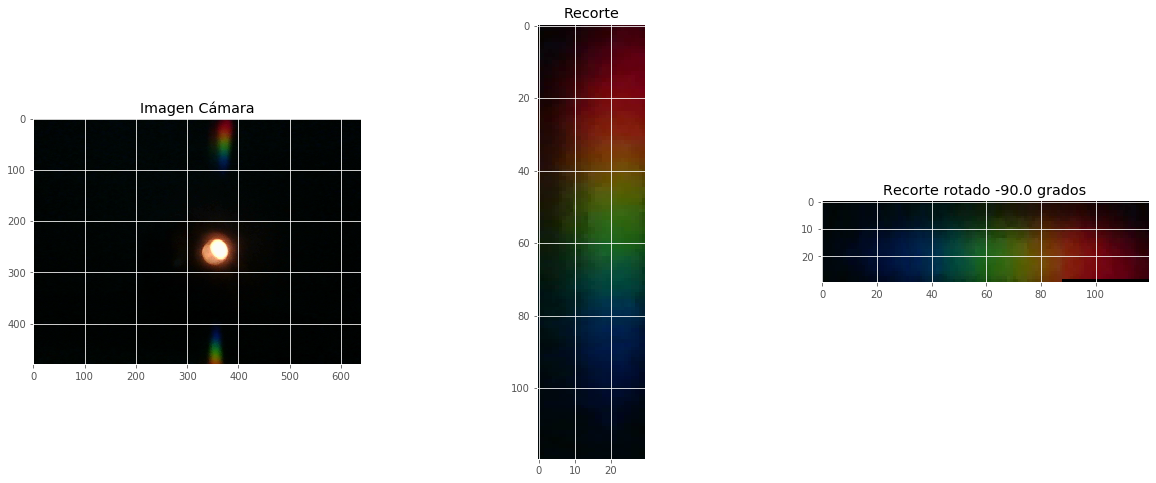

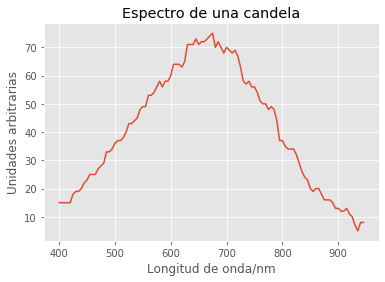

In [32]:
cap = cv2.VideoCapture(0)

#los valores van de -1 = 640 ms hasta -13 = 150 us
#http://www.principiaprogramatica.com/2017/06/11/
#setting-manual-exposure-in-opencv/
#cap.set(cv2.CAP_PROP_EXPOSURE,exposure)


if (cap.isOpened()== False): 
    print("Error opening video stream or file")

cap = cv2.VideoCapture(0, cv2.CAP_DSHOW)
# Define the codec and create VideoWriter object
cap.set(cv2.CAP_PROP_EXPOSURE,exposure)


if (cap.isOpened()== False): 
    print("Error opening video stream or file")

# Read until video is completed
while(cap.isOpened()):

    # Capture frame-by-frame
    ret, frame = cap.read()
    if ret == True:
        # Display the resulting frame
        cv2.imshow('Frame',frame)
        # Press Q on keyboard to  exit
        if cv2.waitKey(25) & 0xFF == ord('q'):
            Ima3 = frame[...,::-1]
            #Ima3 = frame
            print(np.shape(Ima3))
            break

            # Break the loop
  
    else:
        break

# When everything done, release the video capture object
cap.release()

# Closes all the frames
cv2.destroyAllWindows()

Visi = Ima3[filaup:filadown,colleft:colright,:]
spec = ndimage.rotate(Visi,ang)


plt.figure(figsize=(20,8))
plt.subplot(131)
plt.title('Imagen Cámara')
plt.imshow(Ima3)
plt.subplot(132)
plt.title('Recorte')
plt.imshow(Visi)
plt.subplot(133)
plt.title(r'Recorte rotado %.1f grados'%ang)
plt.imshow(spec)
plt.savefig("arcoiris_candela.jpg")
plt.show()

specgris = cv2.cvtColor(spec, cv2.COLOR_BGR2GRAY)
can = specgris[fila,izq:der]

plt.figure()
plt.title('Espectro de una candela')
plt.plot(WL,can)
plt.xlabel('Longitud de onda/nm')
plt.ylabel('Unidades arbitrarias')
plt.savefig("espectro_candela.jpg")
plt.show()

In [33]:
datos_C =  pd.DataFrame({"Longitud de onda":WL,"Intensidad":can},dtype=float)
datos_C.to_csv("Candela.txt", header=True, index=False, sep='\t', mode='a')

Linterna flash

(480, 640, 3)


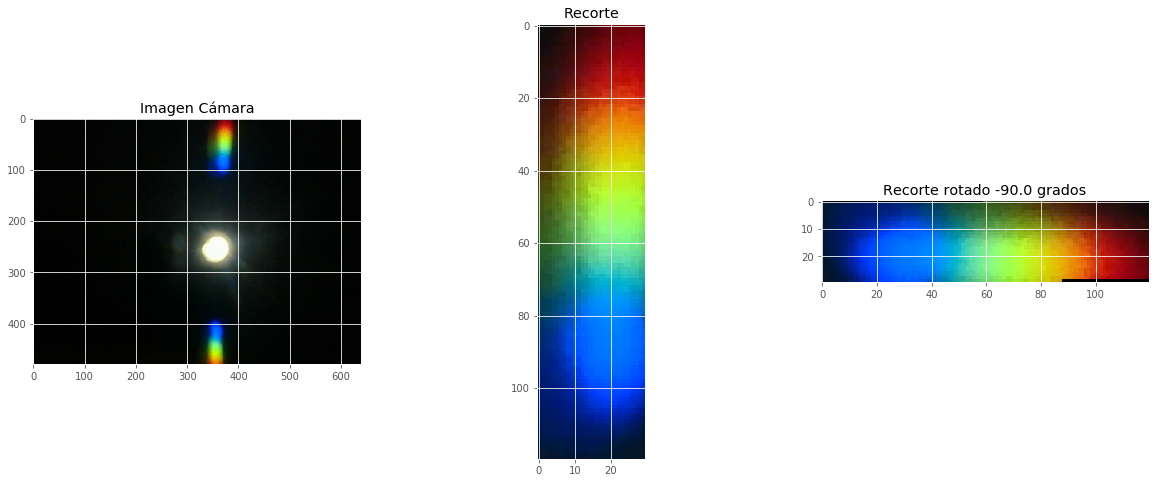

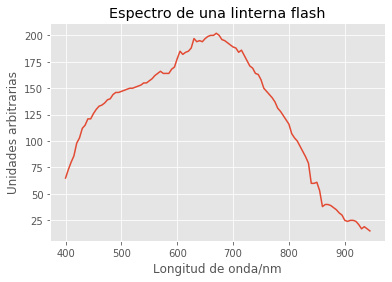

In [34]:
cap = cv2.VideoCapture(0)

#los valores van de -1 = 640 ms hasta -13 = 150 us
#http://www.principiaprogramatica.com/2017/06/11/
#setting-manual-exposure-in-opencv/
#cap.set(cv2.CAP_PROP_EXPOSURE,exposure)


if (cap.isOpened()== False): 
    print("Error opening video stream or file")

cap = cv2.VideoCapture(0, cv2.CAP_DSHOW)
# Define the codec and create VideoWriter object
cap.set(cv2.CAP_PROP_EXPOSURE,exposure)


if (cap.isOpened()== False): 
    print("Error opening video stream or file")

# Read until video is completed
while(cap.isOpened()):

    # Capture frame-by-frame
    ret, frame = cap.read()
    if ret == True:
        # Display the resulting frame
        cv2.imshow('Frame',frame)
        # Press Q on keyboard to  exit
        if cv2.waitKey(25) & 0xFF == ord('q'):
            Ima3 = frame[...,::-1]
            #Ima3 = frame
            print(np.shape(Ima3))
            break

            # Break the loop
  
    else:
        break

# When everything done, release the video capture object
cap.release()

# Closes all the frames
cv2.destroyAllWindows()

Visi = Ima3[filaup:filadown,colleft:colright,:]
spec = ndimage.rotate(Visi,ang)


plt.figure(figsize=(20,8))
plt.subplot(131)
plt.title('Imagen Cámara')
plt.imshow(Ima3)
plt.subplot(132)
plt.title('Recorte')
plt.imshow(Visi)
plt.subplot(133)
plt.title(r'Recorte rotado %.1f grados'%ang)
plt.imshow(spec)
plt.savefig("arcoiris_linterna.jpg")
plt.show()

specgris = cv2.cvtColor(spec, cv2.COLOR_BGR2GRAY)
lin = specgris[fila,izq:der]

plt.figure()
plt.title('Espectro de una linterna flash')
plt.plot(WL,lin)
plt.xlabel('Longitud de onda/nm')
plt.ylabel('Unidades arbitrarias')
plt.savefig("espectro_linterna.jpg")
plt.show()

In [35]:
datos_L =  pd.DataFrame({"Longitud de onda":WL,"Intensidad":lin},dtype=float)
datos_L.to_csv("Linterna.txt", header=True, index=False, sep='\t', mode='a')

Led encontrado en un mouse

(480, 640, 3)


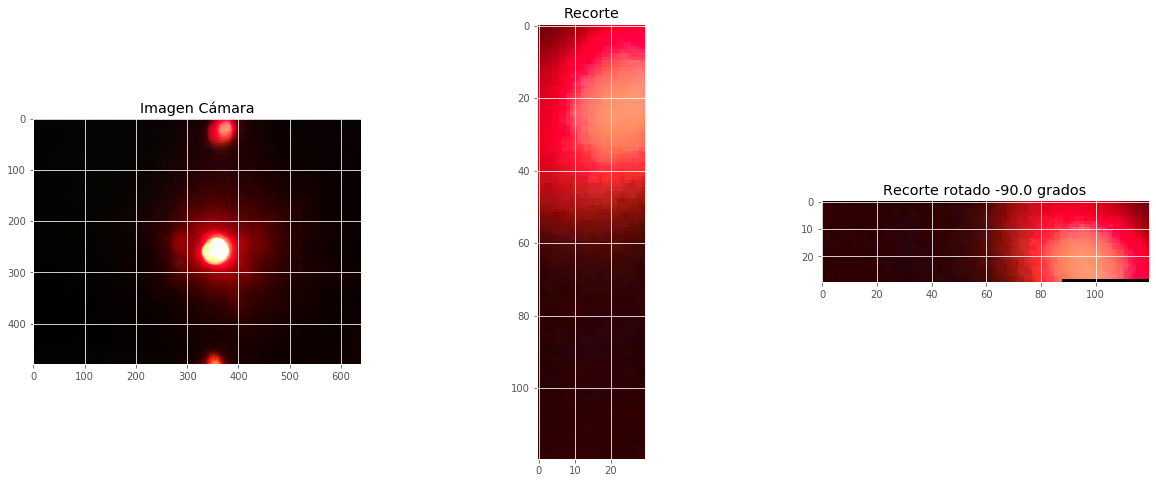

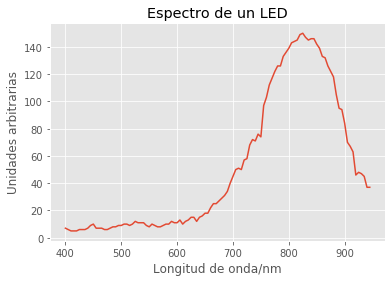

In [37]:
cap = cv2.VideoCapture(0)

#los valores van de -1 = 640 ms hasta -13 = 150 us
#http://www.principiaprogramatica.com/2017/06/11/
#setting-manual-exposure-in-opencv/
#cap.set(cv2.CAP_PROP_EXPOSURE,exposure)


if (cap.isOpened()== False): 
    print("Error opening video stream or file")

cap = cv2.VideoCapture(0, cv2.CAP_DSHOW)
# Define the codec and create VideoWriter object
cap.set(cv2.CAP_PROP_EXPOSURE,exposure)


if (cap.isOpened()== False): 
    print("Error opening video stream or file")

# Read until video is completed
while(cap.isOpened()):

    # Capture frame-by-frame
    ret, frame = cap.read()
    if ret == True:
        # Display the resulting frame
        cv2.imshow('Frame',frame)
        # Press Q on keyboard to  exit
        if cv2.waitKey(25) & 0xFF == ord('q'):
            Ima3 = frame[...,::-1]
            #Ima3 = frame
            print(np.shape(Ima3))
            break

            # Break the loop
  
    else:
        break

# When everything done, release the video capture object
cap.release()

# Closes all the frames
cv2.destroyAllWindows()

Visi = Ima3[filaup:filadown,colleft:colright,:]
spec = ndimage.rotate(Visi,ang)

plt.figure(figsize=(20,8))
plt.subplot(131)
plt.title('Imagen Cámara')
plt.imshow(Ima3)
plt.subplot(132)
plt.title('Recorte')
plt.imshow(Visi)
plt.subplot(133)
plt.title(r'Recorte rotado %.1f grados'%ang)
plt.imshow(spec)
plt.savefig("arcoiris_LED.jpg")
plt.show()

specgris = cv2.cvtColor(spec, cv2.COLOR_BGR2GRAY)
led = specgris[fila,izq:der]

plt.figure()
plt.title('Espectro de un LED')
plt.plot(WL,led)
plt.xlabel('Longitud de onda/nm')
plt.ylabel('Unidades arbitrarias')
plt.savefig("espectro_LED.jpg")
plt.show()

In [38]:
datos_LED =  pd.DataFrame({"Longitud de onda":WL,"Intensidad":led},dtype=float)
datos_LED.to_csv("LED.txt", header=True, index=False, sep='\t', mode='a')

# Ruido

(480, 640, 3)


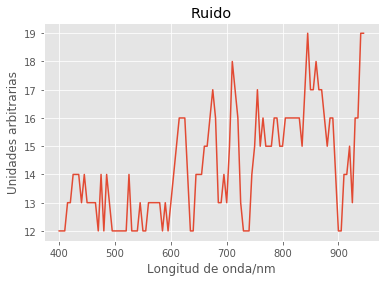

In [34]:
cap = cv2.VideoCapture(0)

#los valores van de -1 = 640 ms hasta -13 = 150 us
#http://www.principiaprogramatica.com/2017/06/11/
#setting-manual-exposure-in-opencv/
#cap.set(cv2.CAP_PROP_EXPOSURE,exposure)


if (cap.isOpened()== False): 
    print("Error opening video stream or file")

cap = cv2.VideoCapture(0, cv2.CAP_DSHOW)
# Define the codec and create VideoWriter object
cap.set(cv2.CAP_PROP_EXPOSURE,exposure)


if (cap.isOpened()== False): 
    print("Error opening video stream or file")

# Read until video is completed
while(cap.isOpened()):

    # Capture frame-by-frame
    ret, frame = cap.read()
    if ret == True:
        # Display the resulting frame
        cv2.imshow('Frame',frame)
        # Press Q on keyboard to  exit
        if cv2.waitKey(25) & 0xFF == ord('q'):
            Ima3 = frame[...,::-1]
            #Ima3 = frame
            print(np.shape(Ima3))
            break

            # Break the loop
  
    else:
        break

# When everything done, release the video capture object
cap.release()

# Closes all the frames
cv2.destroyAllWindows()

Visi = Ima3[filaup:filadown,colleft:colright,:]
spec = ndimage.rotate(Visi,ang)

specgris = cv2.cvtColor(spec, cv2.COLOR_BGR2GRAY)
ruido = specgris[fila,izq:der]

plt.figure()
plt.title('Ruido')
plt.plot(WL,ruido)
plt.xlabel('Longitud de onda/nm')
plt.ylabel('Unidades arbitrarias')
plt.savefig("Ruido.jpg")
plt.show()

In [35]:
Ruido =  pd.DataFrame({"Longitud de onda":WL,"Intensidad":ruido},dtype=float)
Ruido.to_csv("Ruido.txt", header=True, index=False, sep='\t', mode='a')

# Zanahoria

(480, 640, 3)


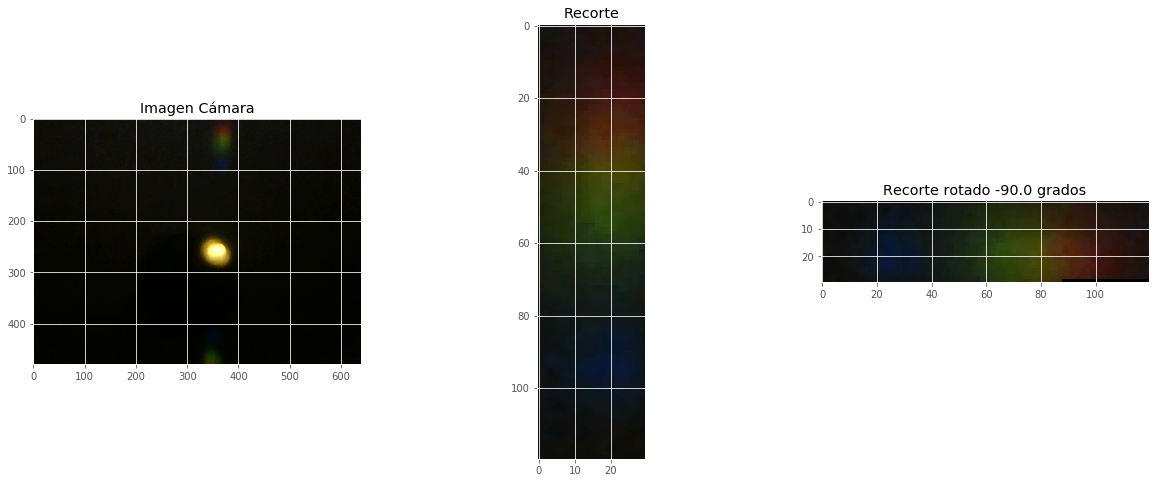

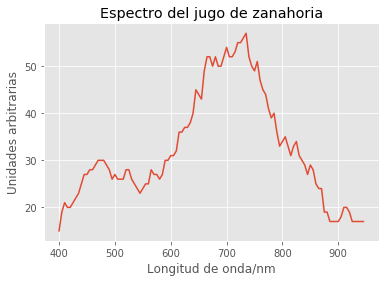

In [39]:
cap = cv2.VideoCapture(0)

#los valores van de -1 = 640 ms hasta -13 = 150 us
#http://www.principiaprogramatica.com/2017/06/11/
#setting-manual-exposure-in-opencv/
#cap.set(cv2.CAP_PROP_EXPOSURE,exposure)


if (cap.isOpened()== False): 
    print("Error opening video stream or file")

cap = cv2.VideoCapture(0, cv2.CAP_DSHOW)
# Define the codec and create VideoWriter object
cap.set(cv2.CAP_PROP_EXPOSURE,exposure)


if (cap.isOpened()== False): 
    print("Error opening video stream or file")

# Read until video is completed
while(cap.isOpened()):

    # Capture frame-by-frame
    ret, frame = cap.read()
    if ret == True:
        # Display the resulting frame
        cv2.imshow('Frame',frame)
        # Press Q on keyboard to  exit
        if cv2.waitKey(25) & 0xFF == ord('q'):
            Ima3 = frame[...,::-1]
            #Ima3 = frame
            print(np.shape(Ima3))
            break

            # Break the loop
  
    else:
        break

# When everything done, release the video capture object
cap.release()

# Closes all the frames
cv2.destroyAllWindows()

Visi = Ima3[filaup:filadown,colleft:colright,:]
spec = ndimage.rotate(Visi,ang)


plt.figure(figsize=(20,8))
plt.subplot(131)
plt.title('Imagen Cámara')
plt.imshow(Ima3)
plt.subplot(132)
plt.title('Recorte')
plt.imshow(Visi)
plt.subplot(133)
plt.title(r'Recorte rotado %.1f grados'%ang)
plt.imshow(spec)
plt.show()

specgris = cv2.cvtColor(spec, cv2.COLOR_BGR2GRAY)
za = specgris[fila,izq:der]

plt.figure()
plt.title('Espectro del jugo de zanahoria')
plt.plot(WL,za)
plt.xlabel('Longitud de onda/nm')
plt.ylabel('Unidades arbitrarias')
plt.savefig("espectro_zanahoria.jpg")
plt.show()

In [45]:
zanahoria =  pd.DataFrame({"Longitud de onda":WL,"Intensidad":za},dtype=float)
zanahoria.to_csv("zanahoria.txt", header=True, index=False, sep='\t', mode='a')

# referencia

(480, 640, 3)


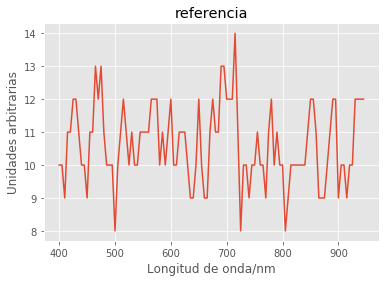

In [42]:
cap = cv2.VideoCapture(0)

#los valores van de -1 = 640 ms hasta -13 = 150 us
#http://www.principiaprogramatica.com/2017/06/11/
#setting-manual-exposure-in-opencv/
#cap.set(cv2.CAP_PROP_EXPOSURE,exposure)


if (cap.isOpened()== False): 
    print("Error opening video stream or file")

cap = cv2.VideoCapture(0, cv2.CAP_DSHOW)
# Define the codec and create VideoWriter object
cap.set(cv2.CAP_PROP_EXPOSURE,exposure)


if (cap.isOpened()== False): 
    print("Error opening video stream or file")

# Read until video is completed
while(cap.isOpened()):

    # Capture frame-by-frame
    ret, frame = cap.read()
    if ret == True:
        # Display the resulting frame
        cv2.imshow('Frame',frame)
        # Press Q on keyboard to  exit
        if cv2.waitKey(25) & 0xFF == ord('q'):
            Ima3 = frame[...,::-1]
            #Ima3 = frame
            print(np.shape(Ima3))
            break

            # Break the loop
  
    else:
        break

# When everything done, release the video capture object
cap.release()

# Closes all the frames
cv2.destroyAllWindows()

Visi = Ima3[filaup:filadown,colleft:colright,:]
spec = ndimage.rotate(Visi,ang)

specgris = cv2.cvtColor(spec, cv2.COLOR_BGR2GRAY)
ref = specgris[fila,izq:der]

plt.figure()
plt.title('referencia')
plt.plot(WL,ref)
plt.xlabel('Longitud de onda/nm')
plt.ylabel('Unidades arbitrarias')
plt.savefig("referencia.jpg")
plt.show()

In [44]:
referencia =  pd.DataFrame({"Longitud de onda":WL,"Intensidad":ref},dtype=float)
referencia.to_csv("referencia.txt", header=True, index=False, sep='\t', mode='a')

In [50]:
n = np.where((ref-ruido) != 0)

In [51]:
T = (graf[n] - ruido[n])/(ref[n]-ruido[n])

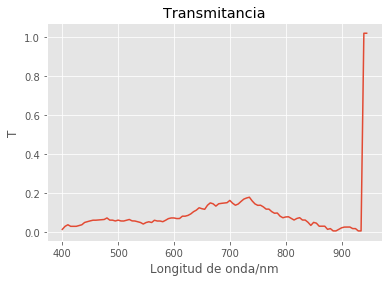

In [57]:
plt.figure()
plt.title('Transmitancia')
plt.plot(WL[n],T)
plt.xlabel('Longitud de onda/nm')
plt.ylabel('T')
plt.savefig("transmitancia.jpg")
plt.show()

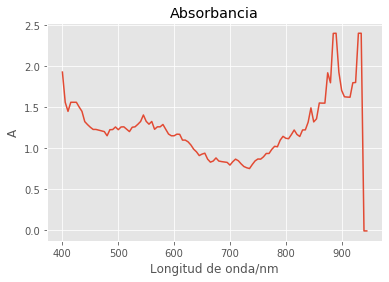

In [58]:
plt.figure()
plt.title('Absorbancia')
plt.plot(WL[n],-np.log10(T))
plt.xlabel('Longitud de onda/nm')
plt.ylabel('A')
plt.savefig("Absorbancia.jpg")
plt.show()

# Reflectancia difusa

(480, 640, 3)


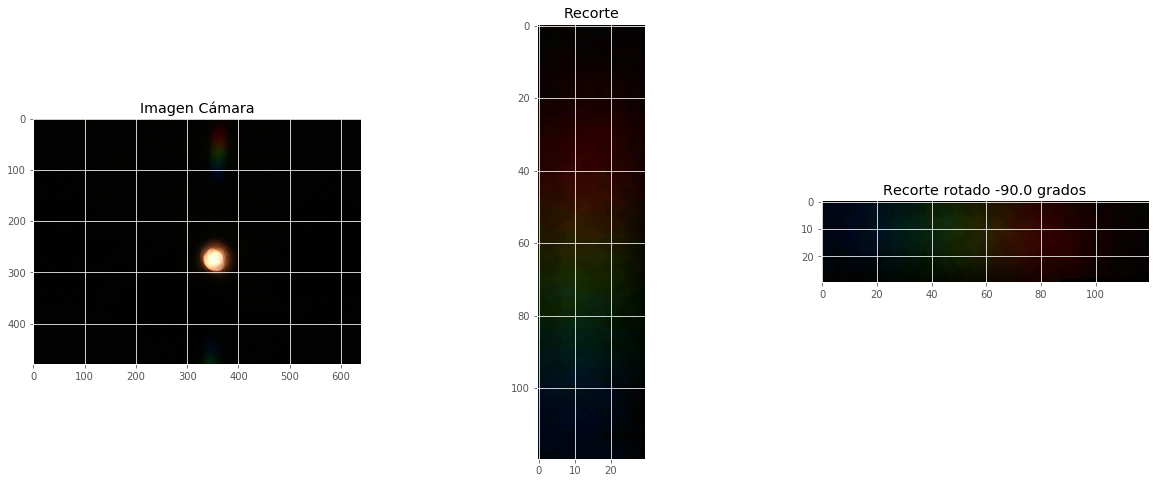

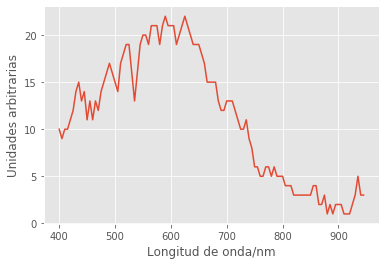

In [20]:
cap = cv2.VideoCapture(0)

#los valores van de -1 = 640 ms hasta -13 = 150 us
#http://www.principiaprogramatica.com/2017/06/11/
#setting-manual-exposure-in-opencv/
#cap.set(cv2.CAP_PROP_EXPOSURE,exposure)


if (cap.isOpened()== False): 
    print("Error opening video stream or file")

cap = cv2.VideoCapture(0, cv2.CAP_DSHOW)
# Define the codec and create VideoWriter object
cap.set(cv2.CAP_PROP_EXPOSURE,exposure)


if (cap.isOpened()== False): 
    print("Error opening video stream or file")

# Read until video is completed
while(cap.isOpened()):

    # Capture frame-by-frame
    ret, frame = cap.read()
    if ret == True:
        # Display the resulting frame
        cv2.imshow('Frame',frame)
        # Press Q on keyboard to  exit
        if cv2.waitKey(25) & 0xFF == ord('q'):
            Ima3 = frame[...,::-1]
            #Ima3 = frame
            print(np.shape(Ima3))
            break

            # Break the loop
  
    else:
        break

# When everything done, release the video capture object
cap.release()

# Closes all the frames
cv2.destroyAllWindows()

Visi = Ima3[filaup:filadown,colleft:colright,:]
spec = ndimage.rotate(Visi,ang)

specgris = cv2.cvtColor(spec, cv2.COLOR_BGR2GRAY)
dif = specgris[fila,izq:der]

plt.figure(figsize=(20,8))
plt.subplot(131)
plt.title('Imagen Cámara')
plt.imshow(Ima3)
plt.subplot(132)
plt.title('Recorte')
plt.imshow(Visi)
plt.subplot(133)
plt.title(r'Recorte rotado %.1f grados'%ang)
plt.imshow(spec)
plt.show()

plt.figure()
plt.plot(WL,dif)
plt.xlabel('Longitud de onda/nm')
plt.ylabel('Unidades arbitrarias')
plt.savefig("difusa.jpg")
plt.show()

# Ruido

(480, 640, 3)


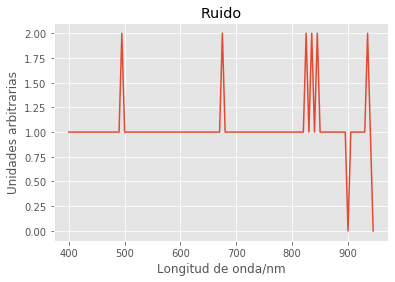

In [21]:
cap = cv2.VideoCapture(0)

#los valores van de -1 = 640 ms hasta -13 = 150 us
#http://www.principiaprogramatica.com/2017/06/11/
#setting-manual-exposure-in-opencv/
#cap.set(cv2.CAP_PROP_EXPOSURE,exposure)


if (cap.isOpened()== False): 
    print("Error opening video stream or file")

cap = cv2.VideoCapture(0, cv2.CAP_DSHOW)
# Define the codec and create VideoWriter object
cap.set(cv2.CAP_PROP_EXPOSURE,exposure)


if (cap.isOpened()== False): 
    print("Error opening video stream or file")

# Read until video is completed
while(cap.isOpened()):

    # Capture frame-by-frame
    ret, frame = cap.read()
    if ret == True:
        # Display the resulting frame
        cv2.imshow('Frame',frame)
        # Press Q on keyboard to  exit
        if cv2.waitKey(25) & 0xFF == ord('q'):
            Ima3 = frame[...,::-1]
            #Ima3 = frame
            print(np.shape(Ima3))
            break

            # Break the loop
  
    else:
        break

# When everything done, release the video capture object
cap.release()

# Closes all the frames
cv2.destroyAllWindows()

Visi = Ima3[filaup:filadown,colleft:colright,:]
spec = ndimage.rotate(Visi,ang)

specgris = cv2.cvtColor(spec, cv2.COLOR_BGR2GRAY)
ruido1 = specgris[fila,izq:der]

plt.figure()
plt.title('Ruido2')
plt.plot(WL,ruido1)
plt.xlabel('Longitud de onda/nm')
plt.ylabel('Unidades arbitrarias')
plt.savefig("Ruido2.jpg")
plt.show()

# referencia

(480, 640, 3)


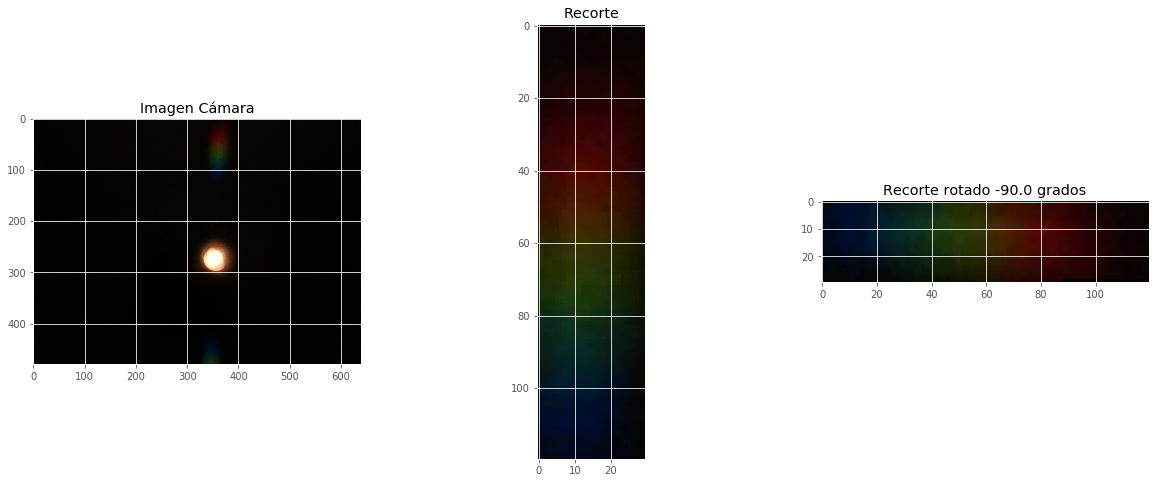

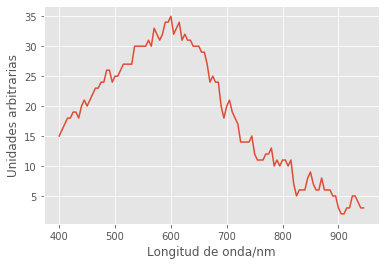

In [22]:
cap = cv2.VideoCapture(0)

#los valores van de -1 = 640 ms hasta -13 = 150 us
#http://www.principiaprogramatica.com/2017/06/11/
#setting-manual-exposure-in-opencv/
#cap.set(cv2.CAP_PROP_EXPOSURE,exposure)


if (cap.isOpened()== False): 
    print("Error opening video stream or file")

cap = cv2.VideoCapture(0, cv2.CAP_DSHOW)
# Define the codec and create VideoWriter object
cap.set(cv2.CAP_PROP_EXPOSURE,exposure)


if (cap.isOpened()== False): 
    print("Error opening video stream or file")

# Read until video is completed
while(cap.isOpened()):

    # Capture frame-by-frame
    ret, frame = cap.read()
    if ret == True:
        # Display the resulting frame
        cv2.imshow('Frame',frame)
        # Press Q on keyboard to  exit
        if cv2.waitKey(25) & 0xFF == ord('q'):
            Ima3 = frame[...,::-1]
            #Ima3 = frame
            print(np.shape(Ima3))
            break

            # Break the loop
  
    else:
        break

# When everything done, release the video capture object
cap.release()

# Closes all the frames
cv2.destroyAllWindows()

Visi = Ima3[filaup:filadown,colleft:colright,:]
spec = ndimage.rotate(Visi,ang)

specgris = cv2.cvtColor(spec, cv2.COLOR_BGR2GRAY)
ref2 = specgris[fila,izq:der]

plt.figure(figsize=(20,8))
plt.subplot(131)
plt.title('Imagen Cámara')
plt.imshow(Ima3)
plt.subplot(132)
plt.title('Recorte')
plt.imshow(Visi)
plt.subplot(133)
plt.title(r'Recorte rotado %.1f grados'%ang)
plt.imshow(spec)
plt.show()

plt.figure()
plt.plot(WL,ref2)
plt.xlabel('Longitud de onda/nm')
plt.ylabel('Unidades arbitrarias')
plt.savefig("referencia2.jpg")
plt.show()

In [23]:
m = np.where((ref2-ruido1) != 0)

In [24]:
R =1- (dif[m] - ruido1[m])/(ref2[m]-ruido1[m])

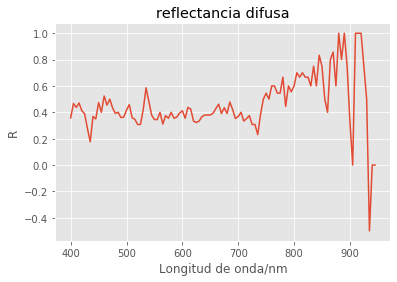

In [25]:
plt.figure()
plt.title('reflectancia difusa')
plt.plot(WL[m],R)
plt.xlabel('Longitud de onda/nm')
plt.ylabel('R')
plt.savefig("reflectancia.jpg")
plt.show()

In [27]:
k = np.where(R>=0)

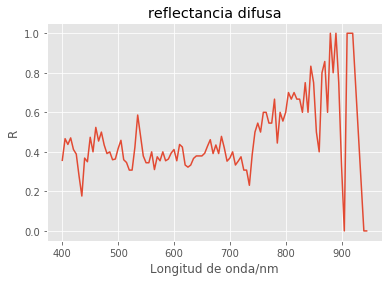

In [28]:
plt.figure()
plt.title('reflectancia difusa')
plt.plot(WL[k],R[k])
plt.xlabel('Longitud de onda/nm')
plt.ylabel('R')
plt.savefig("reflectancia.jpg")
plt.show()